In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline


In [3]:
filename = 'C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW4_Submission/wine.csv'
data = pd.read_csv(filename)
data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
sns.set(style='whitegrid', context='notebook')

sns.pairplot(data, hue="Class", size=2.5)
plt.tight_layout()
plt.show()

In [6]:
#Checking if there is any existing null value or not
print("Per column number of null value:", data.isnull().sum())

Per column number of null value: Class                          0
Alcohol                        0
Malic_acid                     0
Ash                            0
Alcalinity_of_ash              0
Magnesium                      0
Total_phenols                  0
Flavanoids                     0
Nonflavanoid_phenols           0
Proanthocyanins                0
Color_intensity                0
Hue                            0
OD280/OD315of_diluted_wines    0
Proline                        0
dtype: int64


In [7]:
#Count the unique values in "Class"
print('Member per class:',data["Class"].value_counts())

Member per class: 2    71
1    59
3    48
Name: Class, dtype: int64


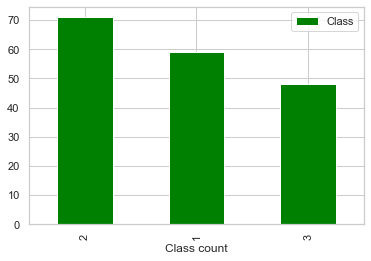

In [8]:
#Plot for class
data["Class"].value_counts().plot.bar(color='Green')
plt.xlabel("Class count")
plt.legend()
plt.show()

In [9]:
#Checking the dimensions
print('Dimensions:', data.shape)

Dimensions: (178, 14)


In [15]:
# distributing the dataset into two components X and Y (target)
X = data.iloc[:, 1:13].values
y = data.iloc[:, 0].values # target column = class
#assignment
X_train= X
y_train= y

X


X:



array([[14.23,  1.71,  2.43, ...,  5.64,  1.04,  3.92],
       [13.2 ,  1.78,  2.14, ...,  4.38,  1.05,  3.4 ],
       [13.16,  2.36,  2.67, ...,  5.68,  1.03,  3.17],
       ...,
       [13.27,  4.28,  2.26, ..., 10.2 ,  0.59,  1.56],
       [13.17,  2.59,  2.37, ...,  9.3 ,  0.6 ,  1.62],
       [14.13,  4.1 ,  2.74, ...,  9.2 ,  0.61,  1.6 ]])

In [16]:
# Preprocessing: Feature Scaling-standardizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [18]:
#Covariance matrix calculation
mean_vec = np.mean(X_train, axis=0)
#cov_matrix = ( ((X_train - mean_vec).T).dot(X_train - mean_vec) ) / (X_train.shape[0]-1)
#print('Covariance matrix \n%s' %cov_matrix)
print('NumPy covariance matrix: \n%s' %np.cov(X_train.T))

NumPy covariance matrix: 
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388]
 [ 0.23815287 -0.41332866  0.11572743 -0.353355    0.19688989  0.86944804
   1.00

In [19]:
# eigen values and eigen vectors calculation
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
print('\nEigenvalues: \n%s' %eigen_vals)
print('Eigenvectors: \n%s' %eigen_vecs)


Eigenvalues: 
[4.42079223 2.18758658 1.42758975 0.89289016 0.82042272 0.63552536
 0.55097787 0.34868444 0.10400644 0.17046215 0.26100162 0.24785727]
Eigenvectors: 
[[-9.11169231e-02 -5.13423477e-01  2.72161171e-01 -5.63474760e-02
   3.46100455e-01 -3.07290849e-01 -1.10711168e-02 -4.76373100e-01
   1.99337075e-02 -2.99147087e-01 -3.10651055e-01 -1.52281965e-01]
 [ 2.70461420e-01 -2.12854112e-01 -5.36754992e-02 -4.79292304e-01
  -3.74837071e-01 -4.49504530e-01 -4.24980530e-01 -5.97826234e-02
   2.54783201e-02  1.26378200e-01  2.01018175e-01  2.55290246e-01]
 [ 3.22864546e-02 -3.68822568e-01 -6.04042874e-01  1.11362110e-01
   2.23411700e-01 -1.98970633e-01  1.21932106e-01  1.78045870e-01
  -1.37505811e-01 -8.00587449e-02  4.55101726e-01 -3.42276908e-01]
 [ 2.34040839e-01 -8.08713241e-04 -6.22591626e-01 -5.77734149e-02
  -1.49721506e-01  1.34509215e-01  3.23527979e-01 -4.14438894e-01
   8.66273232e-02 -2.04731976e-02 -3.89504948e-01  2.78728137e-01]
 [-1.15882168e-01 -3.60852218e-01 -7.96

In [22]:
# list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sorting the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort()
eigen_pairs.reverse()

In [23]:
print('Eigenvalues in descending order:')
for i in eigen_pairs:
    print(i[0]) #print eigen values

Eigenvalues in descending order:
4.420792232219302
2.187586584188425
1.4275897522572607
0.8928901591664427
0.8204227235864925
0.6355253575691518
0.5509778679769051
0.34868444433772744
0.26100162211989764
0.24785727300358565
0.17046215131364395
0.10400644243066297


In [24]:
#explained_variance calculation
total = sum(eigen_vals)
print('Sum of eigen values:', total)
explained_variance = [(i / total)*100 for i in sorted(eigen_vals, reverse=True)]
print('Explained variance:', explained_variance)

Sum of eigen values: 12.067796610169497
Explained variance: [36.632969340019486, 18.12747309931419, 11.829746542581228, 7.398949352643272, 6.7984467263487405, 5.266291586598307, 4.565687389134465, 2.889379524708695, 2.1627943406002745, 2.0538734701139814, 1.4125374898181164, 0.8618511381192573]


In [25]:
#Cumulative sum
print('Cumulative sum',np.cumsum(explained_variance))

Cumulative sum [ 36.63296934  54.76044244  66.59018898  73.98913833  80.78758506
  86.05387665  90.61956404  93.50894356  95.6717379   97.72561137
  99.13814886 100.        ]


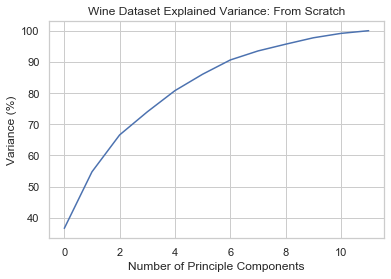

In [28]:
#Plotting Explained Variance vs. no of principal components
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Principle Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Wine Dataset Explained Variance: From Scratch')
plt.show()

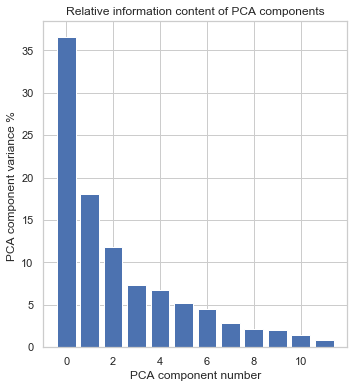

In [31]:
#pca vs variance
fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.bar(np.arange(12), explained_variance)
plt.title('Relative information content of PCA components')
plt.xlabel("PCA component number")
plt.ylabel("PCA component variance % ")
plt.show()

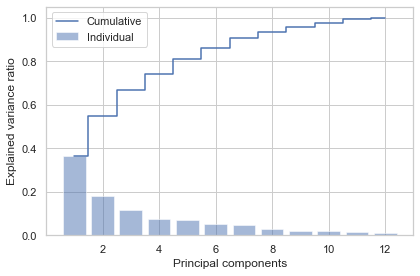

In [32]:
tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [29]:
#converting eigen pairs to matrix: taking first two PCs
matrix_w = np.hstack((eigen_pairs[0][1].reshape(12,1),
                      eigen_pairs[1][1].reshape(12,1)
                      #eigen_pairs[2][1].reshape(12,1) #if 3 pc required
                      ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.09111692 -0.51342348]
 [ 0.27046142 -0.21285411]
 [ 0.03228645 -0.36882257]
 [ 0.23404084 -0.00080871]
 [-0.11588217 -0.36085222]
 [-0.40175899 -0.17443853]
 [-0.43705671 -0.10421375]
 [ 0.31196969  0.0411068 ]
 [-0.32457439 -0.14653601]
 [ 0.14766533 -0.53713151]
 [-0.32815288  0.25670862]
 [-0.40584515  0.07734954]]


In [30]:
#projection to new feature space by taking dot product of matrix
X_train_new = X_train.dot(matrix_w)
print('X_train_new: \n',X_train_new)
# taking first and second pca
pca1 = X_train_new[:, 0]
pca2 = X_train_new[:, 1]
data["PC1"] = X_train_new[:,0]
data["PC2"] = X_train_new[:,1]

X_train_new: 
 [[-2.99074115e+00 -1.79015155e+00]
 [-2.02609080e+00  4.99051191e-01]
 [-2.13933414e+00 -1.14948636e+00]
 [-2.97779920e+00 -2.74417600e+00]
 [-9.71666555e-01 -1.30254425e+00]
 [-2.32362364e+00 -1.85490144e+00]
 [-1.93017090e+00 -9.05971390e-01]
 [-1.48881657e+00 -1.34468227e+00]
 [-2.21010702e+00 -9.24635580e-01]
 [-2.49107455e+00 -9.44287809e-01]
 [-2.81257378e+00 -1.04469103e+00]
 [-1.27810424e+00 -1.30870983e-01]
 [-1.61465637e+00 -2.64306185e-01]
 [-3.07512516e+00 -1.22801815e+00]
 [-3.54069673e+00 -1.93577410e+00]
 [-1.71999624e+00 -1.42064902e+00]
 [-1.55407825e+00 -2.23408029e+00]
 [-1.46475822e+00 -1.62348451e+00]
 [-2.59769719e+00 -2.05238419e+00]
 [-1.94914753e+00 -1.44742901e+00]
 [-3.09297185e+00 -1.44041572e+00]
 [-1.08876540e+00 -5.72341156e-01]
 [-2.36903373e+00  1.63140801e-03]
 [-1.52100084e+00  5.85035861e-01]
 [-1.76532988e+00  5.14634980e-02]
 [-8.81335818e-01 -1.35153095e+00]
 [-1.37806503e+00 -4.46043221e-01]
 [-8.22236021e-01  7.09852760e-01]
 [-2.

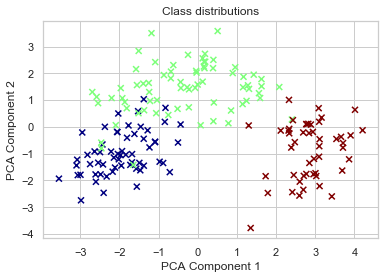

In [33]:
#Class distributions
fig.add_subplot(1,2,2)
plt.scatter(pca1, pca2, c=y_train, marker='x', cmap='jet')
plt.title('Class distributions')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


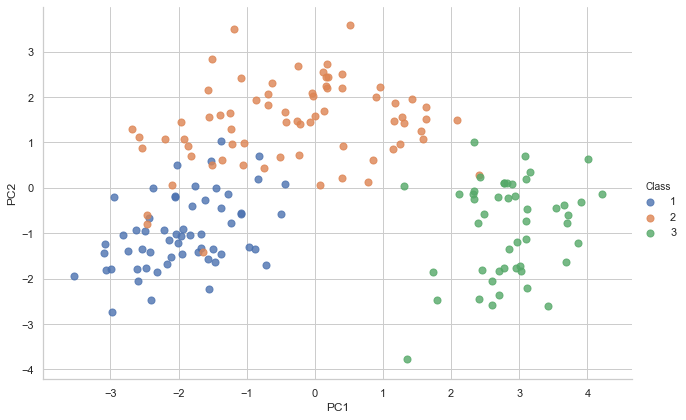

In [34]:
# Distribution checking of new data
sns.lmplot(data = data[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
plt.show()

In [38]:
##Now verifying using scikitlearn-PCA

In [43]:
# Preprocessing: Feature Scaling
sc = StandardScaler()
X_train_PCA = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA() # n_components = 2
X_train_PCA = pca.fit_transform(X_train_PCA)

explained_variance = pca.explained_variance_ratio_
print('Explained variance:',explained_variance * 100)
#print('pca.n_components', pca.n_components_)

Explained variance: [36.63296934 18.1274731  11.82974654  7.39894935  6.79844673  5.26629159
  4.56568739  2.88937952  2.16279434  2.05387347  1.41253749  0.86185114]


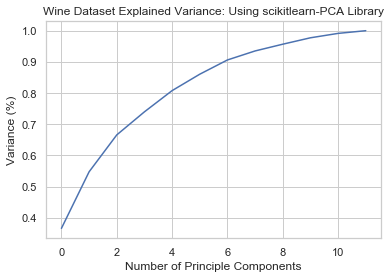

In [41]:
#Plotting Explained Variance vs. no of principal components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principle Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Wine Dataset Explained Variance: Using scikitlearn-PCA Library')
plt.show()

In [42]:
#Cumulative sum
print('Cumulative sum',np.cumsum(pca.explained_variance_ratio_ *100))

Cumulative sum [ 36.63296934  54.76044244  66.59018898  73.98913833  80.78758506
  86.05387665  90.61956404  93.50894356  95.6717379   97.72561137
  99.13814886 100.        ]
